In [2]:
!pip install -U pandas-profiling

DEPRECATION: uvicorn 0.14.0 has a non-standard dependency specifier click>=7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of uvicorn or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
!pip install ydata_profiling

DEPRECATION: uvicorn 0.14.0 has a non-standard dependency specifier click>=7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of uvicorn or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
!pip install ipywidgets

DEPRECATION: uvicorn 0.14.0 has a non-standard dependency specifier click>=7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of uvicorn or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd

import numpy as np

# Our package
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

In [3]:
df = pd.read_csv("transactions.csv")

In [1]:
# ProfileReport(df)

In [4]:
import matplotlib.pyplot as plt

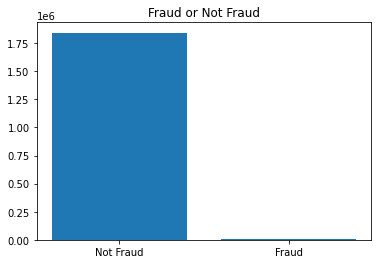

In [5]:
labels = ["Not Fraud", "Fraud"]
fig, ax = plt.subplots()
ax.bar(labels, df.groupby(["is_fraud"]).count()["first"])
ax.set_title("Fraud or Not Fraud")
plt.show()

In [49]:
def get_age_group(age):
    if age >= 19 and age < 29:
        return '19-28'
    elif age >= 29 and age < 39:
        return '29-38'
    elif age >= 39 and age < 49:
        return '39-48'
    elif age >= 49 and age < 59:
        return '49-58'
    elif age >= 59 and age < 69:
        return '59-68'
    elif age >= 69 and age < 79:
        return '69-78'
    elif age >= 79 and age < 89:
        return '79-88'
    elif age >= 89 and age < 99:
        return '89-98'
    else:
        return '99+'

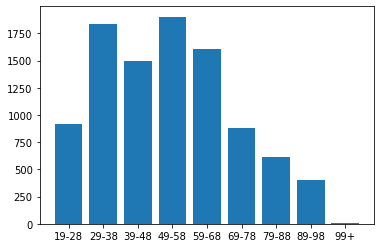

In [50]:
import datetime as DT
now = pd.Timestamp('now')
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['dob']).astype('<m8[Y]')
# test = df["age"].to_numpy()
# test = [ int(x) for x in test ]
labels = ['19-28', '29-38', '39-48', '49-58', '59-68', '69-78','79-88','89-98','99+']
df['Age_Group'] = df['age'].apply(get_age_group)

newdf = df[df.is_fraud != 0]

fig, ax = plt.subplots()
ax.bar(labels, newdf.groupby(["Age_Group"]).count()["is_fraud"])
plt.show()

In [51]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,Age_Group
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35.0,29-38
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45.0,39-48
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,62.0,59-68
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57.0,49-58
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37.0,29-38


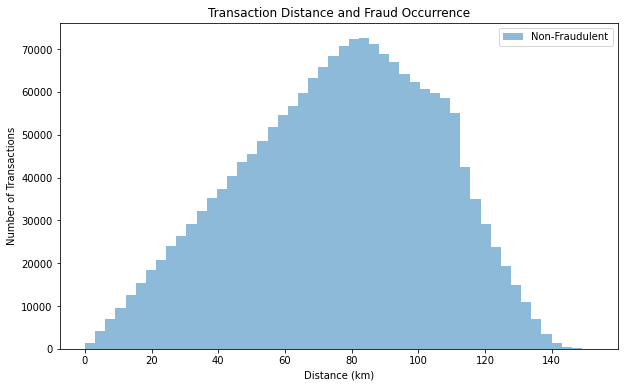

In [55]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles
    return c * r

# Apply the Haversine function to calculate distances
df['distance'] = df.apply(lambda x: haversine(x['long'], x['lat'], x['merch_long'], x['merch_lat']), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Fraudulent transactions
fraud_distances = df[df['is_fraud'] == 1]['distance']
# Non-fraudulent transactions
non_fraud_distances = df[df['is_fraud'] == 0]['distance']

ax.hist(non_fraud_distances, bins=50, alpha=0.5, label='Non-Fraudulent')
# ax.hist(fraud_distances, bins=50, alpha=0.5, label='Fraudulent')

ax.set_xlabel('Distance (km)')
ax.set_ylabel('Number of Transactions')
ax.set_title('Transaction Distance and Fraud Occurrence')
ax.legend()

plt.show()

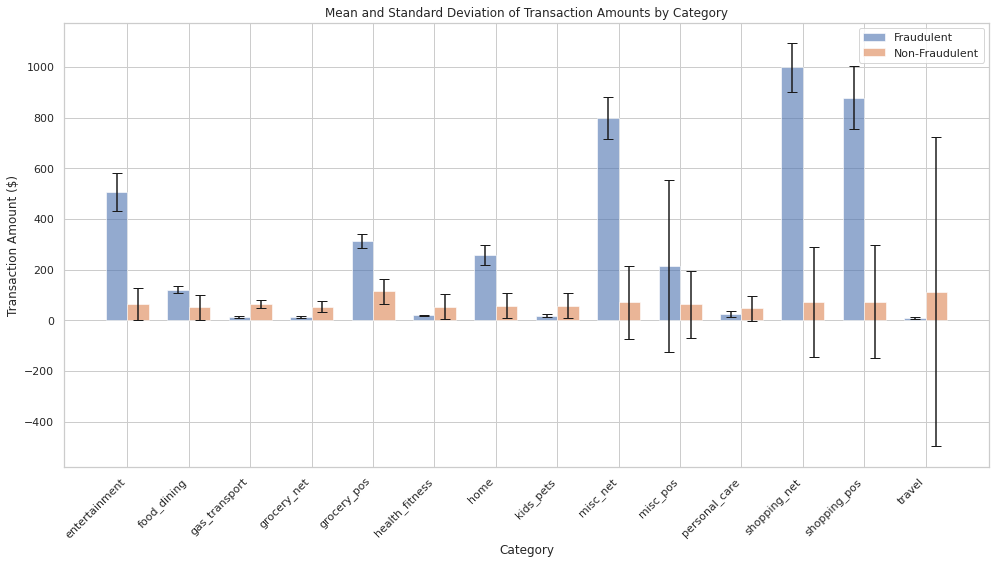

In [67]:
# Separate the data into fraudulent and non-fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Calculate mean and standard deviation of transaction amount for each category
fraud_stats = fraud_df.groupby('category')['amt'].agg(['mean', 'std']).reset_index()
non_fraud_stats = non_fraud_df.groupby('category')['amt'].agg(['mean', 'std']).reset_index()

# Prepare the plot
plt.figure(figsize=(14, 8))

# Number of categories
n_categories = fraud_stats.shape[0]
index = np.arange(n_categories)

bar_width = 0.35

# Plotting
plt.bar(index, fraud_stats['mean'], bar_width, yerr=fraud_stats['std'], capsize=5, label='Fraudulent', alpha=0.6)
plt.bar(index + bar_width, non_fraud_stats['mean'], bar_width, yerr=non_fraud_stats['std'], capsize=5, label='Non-Fraudulent', alpha=0.6)

plt.xlabel('Category')
plt.ylabel('Transaction Amount ($)')
plt.title('Mean and Standard Deviation of Transaction Amounts by Category')
plt.xticks(index + bar_width / 2, fraud_stats['category'], rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()

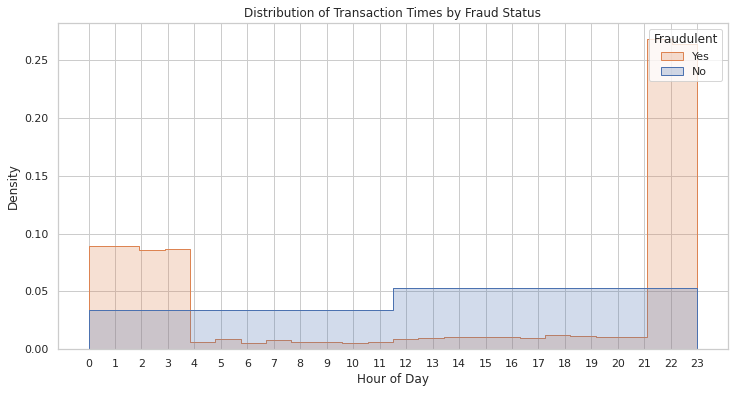

In [71]:
import seaborn as sns
# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract the hour from the transaction time
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='transaction_hour', hue='is_fraud', bins=24, element='step', stat='density', common_norm=False)
plt.title('Distribution of Transaction Times by Fraud Status')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xticks(range(0, 24))
plt.legend(title='Fraudulent', labels=['Yes', 'No'])

plt.show()

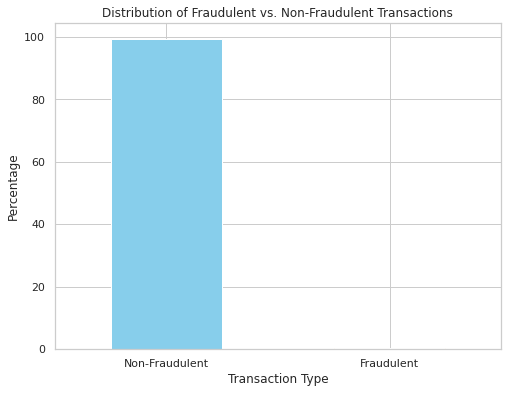

In [70]:
# Calculate the distribution of fraudulent vs. non-fraudulent transactions
fraud_distribution = df['is_fraud'].value_counts(normalize=True) * 100

# Create a bar plot for the distribution
fraud_distribution.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()